# Import Modules

In [99]:
import pandas as pd

import utils

# Load Data

In [104]:
target_vegetable = "はくさい"
train_size = 4000

In [105]:
train = pd.read_csv("./data/train.csv")
train["date"] = pd.to_datetime(train["date"], format="%Y%m%d")

train["year"] = train.date.dt.year
years = pd.get_dummies(train["year"])
train = train.drop(columns="year")
train = pd.concat([train, years], axis=1)

train["month"] = train.date.dt.month
months = pd.get_dummies(train["month"])
train = train.drop(columns="month")
train = pd.concat([train, months], axis=1)

train["weekday"] = train.date.dt.weekday
weekdays = pd.get_dummies(train["weekday"])
train = train.drop(columns="weekday")
train = pd.concat([train, weekdays], axis=1)

areas = pd.get_dummies(train["area"])
train = train.drop(columns="area")
train = pd.concat([train, areas], axis=1)

target_values = utils.get_target_values(train, target_vegetable)
train_x, train_y, test_y, train, test, ss = utils.preprocess_data(target_values, train_size=train_size, T=10)

# Training

In [106]:
future = target_values.shape[0] - train_size
pred_y = utils.pipeline_rnn(train_x, train_y, train, test, test_y, future=future, num_epochs=100)

training loss = 1.0048893690109253
test loss = 1.4037632942199707
training loss = 0.2702785134315491
test loss = 1.2683024406433105
training loss = 0.17329493165016174
test loss = 1.7452492713928223
training loss = 0.15775328874588013
test loss = 0.9018496870994568
training loss = 0.14751611649990082
test loss = 0.879842221736908
training loss = 0.14480064809322357
test loss = 0.6450117826461792
training loss = 0.14206580817699432
test loss = 0.8685532808303833
training loss = 0.14479531347751617
test loss = 1.1014262437820435
training loss = 0.14527972042560577
test loss = 0.6873083710670471
training loss = 0.14126698672771454
test loss = 0.9270856976509094


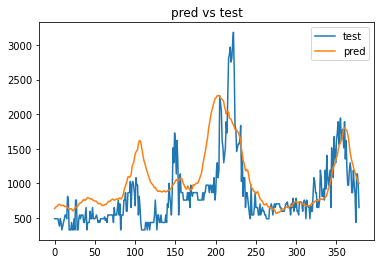

In [107]:
utils.plot_prediction(pred_y, test_y, ss)